In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score, r2score
from sklearn.ensemble import RandomForestRegressor

In [3]:
uber = pd.read_csv('uber.csv')

In [4]:
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
uber.dropna(inplace=True)

In [9]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
uber_clean = uber.drop(['Unnamed: 0','key'],axis=1)

In [16]:
corrs = uber_clean.corr()

In [17]:
corrs

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<AxesSubplot:>

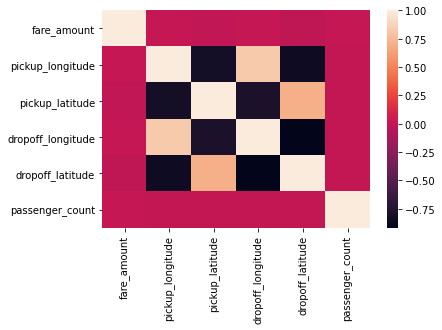

In [18]:
sns.heatmap(corrs)

<AxesSubplot:xlabel='fare_amount'>

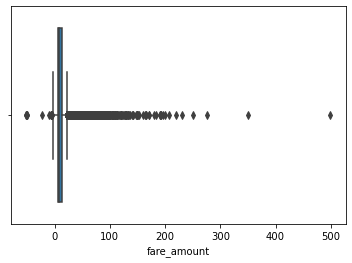

In [20]:
sns.boxplot(uber_clean['fare_amount'])

In [21]:
uber_clean.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [22]:
uber_clean['pickup_datetime'] = pd.to_datetime(uber_clean['pickup_datetime'])

In [23]:
uber_clean.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [25]:
uber_clean = uber_clean.assign(hour = uber_clean.pickup_datetime.dt.hour, day = uber_clean.pickup_datetime.dt.hour, month = uber_clean.pickup_datetime.dt.month, dayofweek = uber_clean.pickup_datetime.dt.dayofweek)

In [26]:
uber_clean.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int64
day                                int64
month                              int64
dayofweek                          int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dayofweek            AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dtype: object

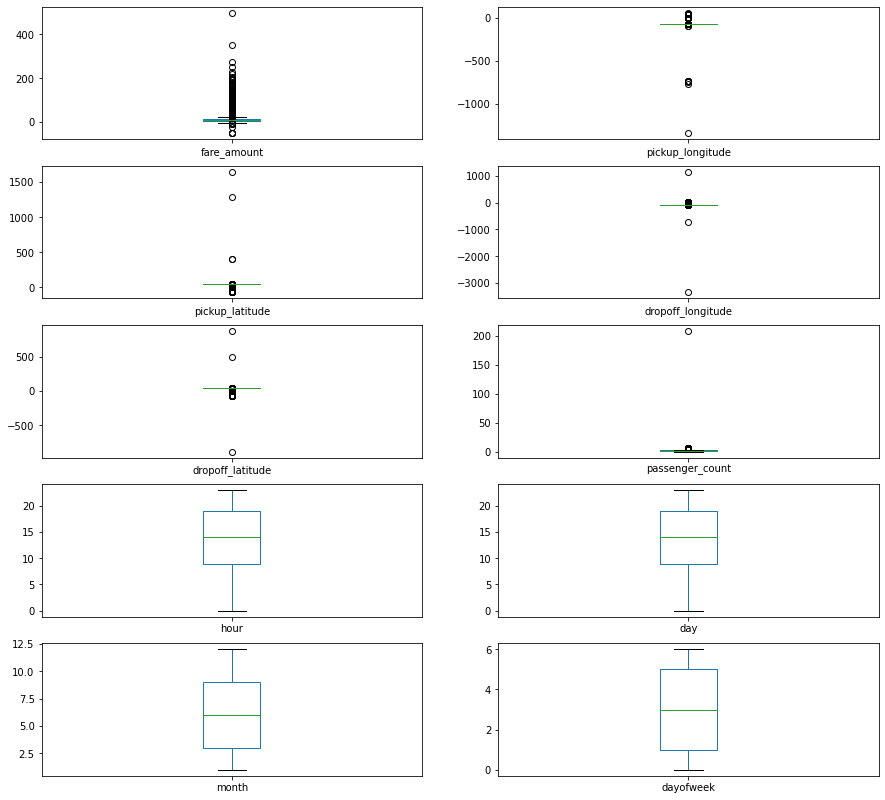

In [29]:
uber_clean.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20))

In [36]:
def remove_outlier(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3-Q1
    lower = Q1-1.5*iqr
    upper = Q3 + 1.5*iqr
    data[col] = np.clip(data[col],lower,upper)
    return data

def treat_outliers(data, cols):
    for col in cols:
        data1 = remove_outlier(data, col)
    return data1

In [37]:
treat_outliers(uber_clean, uber_clean.iloc[:,0::])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayofweek
0,7.50,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,19,5,3
1,7.70,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,20,7,4
2,12.90,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,21,8,0
3,5.30,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,8,6,4
4,16.00,2014-08-28 17:47:00+00:00,-73.929788,40.744085,-73.973082,40.761247,3.5,17,17,8,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,10,10,6
199996,7.50,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0,1,1,3,4
199997,22.25,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.922036,40.692588,2.0,0,0,6,0
199998,14.50,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0,14,14,5,2


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dayofweek            AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dtype: object

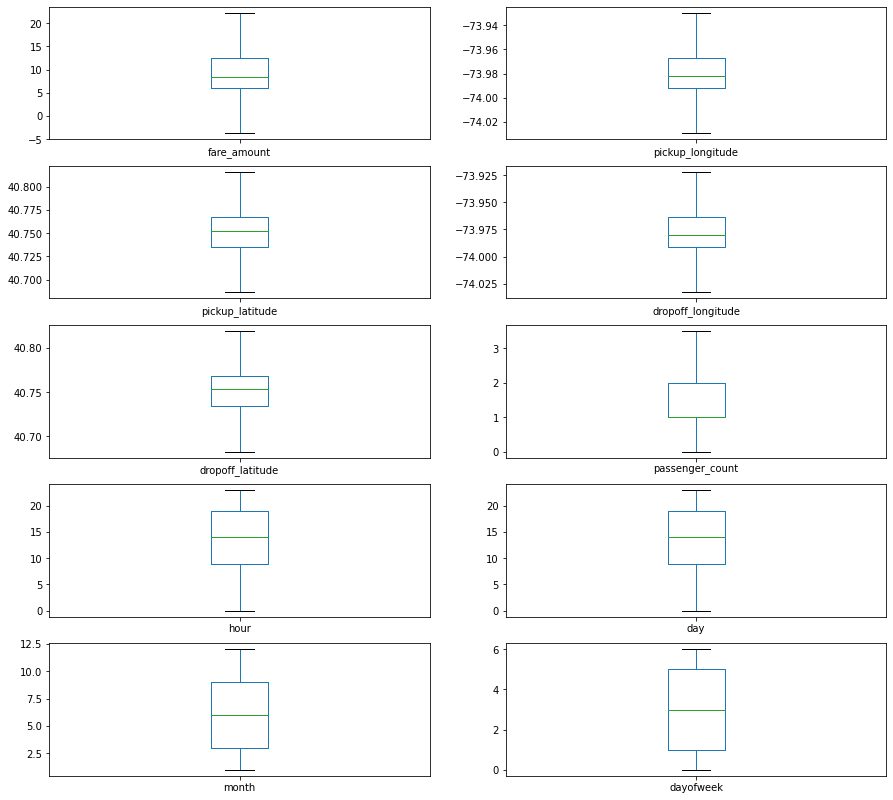

In [38]:
uber_clean.plot(kind='box', subplots=True, layout=(7,2), figsize=(15,20))

In [39]:
!pip install haversine

In [41]:
import haversine as hs

In [44]:
X = uber_clean[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','dayofweek']]
y = uber_clean['fare_amount']          

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [48]:
linear = LinearRegression()

In [49]:
linear.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = linear.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mse = mean_squared_error(y_test, y_pred)

In [54]:
rmse = np.sqrt(mse)

In [55]:
rmse

5.188858110709587

In [56]:
r2Score = r2_score(y_test,y_pred)

In [57]:
r2Score

0.08793977518816631

In [58]:
rf = RandomForestRegressor()

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred_rf = rf.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[11.5 13.5  9.  ...  8.5  6.5 21.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.